In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import numpy as np

In [ ]:
# Load the dataset (update the file path as needed)
file_path = 'amz_uk_price_prediction_dataset.csv'  # Replace this with the correct file path
data = pd.read_csv(file_path)

In [ ]:
data.columns

In [8]:
# Part 1: Analyzing Best-Seller Trends Across Product Categories

# Crosstab Analysis
crosstab = pd.crosstab(data['category'], data['isBestSeller'])
print(crosstab)

isBestSeller                    False  True 
category                                    
3D Printers                       247      1
3D Printing & Scanning           4065      2
Abrasive & Finishing Products     245      5
Action Cameras                   1696      1
Adapters                          251      3
...                               ...    ...
Wind Instruments                  243      7
Window Treatments                 234      5
Women                           17559    213
Women's Sports & Outdoor Shoes   1939     20
eBook Readers & Accessories       246      0

[296 rows x 2 columns]


In [9]:
# Calculate the proportion of best-sellers for each category
crosstab_prop = crosstab.div(crosstab.sum(1), axis=0)
crosstab_prop = crosstab_prop.sort_values(by=True, ascending=False)
print(crosstab_prop.head(10))

isBestSeller                       False     True 
category                                          
Grocery                         0.941865  0.058135
Smart Home Security & Lighting  0.942308  0.057692
Health & Personal Care          0.942314  0.057686
Mobile Phone Accessories        0.957529  0.042471
Power & Hand Tools              0.964661  0.035339
Billiard, Snooker & Pool        0.967871  0.032129
Pet Supplies                    0.969800  0.030200
Home Brewing & Wine Making      0.971545  0.028455
Wind Instruments                0.972000  0.028000
Mirrors                         0.972000  0.028000


In [10]:
# Statistical Tests
chi2, p, dof, ex = chi2_contingency(crosstab)
print(f"Chi-square test statistic: {chi2}")
print(f"P-value: {p}")

Chi-square test statistic: 36540.20270061387
P-value: 0.0


In [11]:
# Compute Cramér's V
n = crosstab.sum().sum()
cramers_v = np.sqrt((chi2 / n) / (min(crosstab.shape) - 1))
print(f"Cramér's V: {cramers_v}")

Cramér's V: 0.1222829439760564


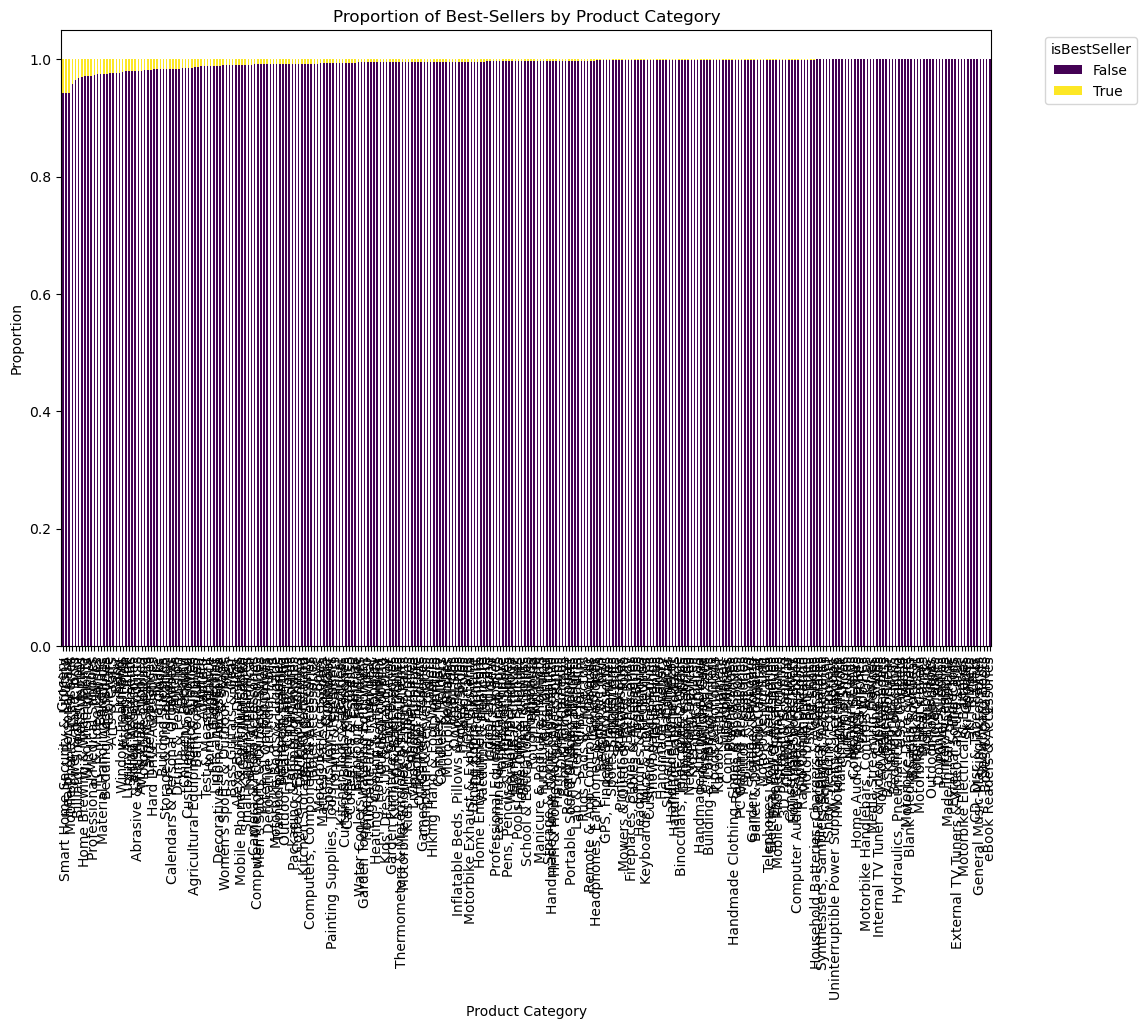

In [12]:
# Visualizations - Stacked Bar Chart
crosstab_prop.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Proportion of Best-Sellers by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Proportion')
plt.legend(title='isBestSeller', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

In [13]:
# Part 2: Exploring Product Prices and Ratings Across Categories and Brands

# Remove outliers in product prices using IQR method
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1
filter = (data['price'] >= (Q1 - 1.5 * IQR)) & (data['price'] <= (Q3 + 1.5 * IQR))
data_no_outliers = data.loc[filter]

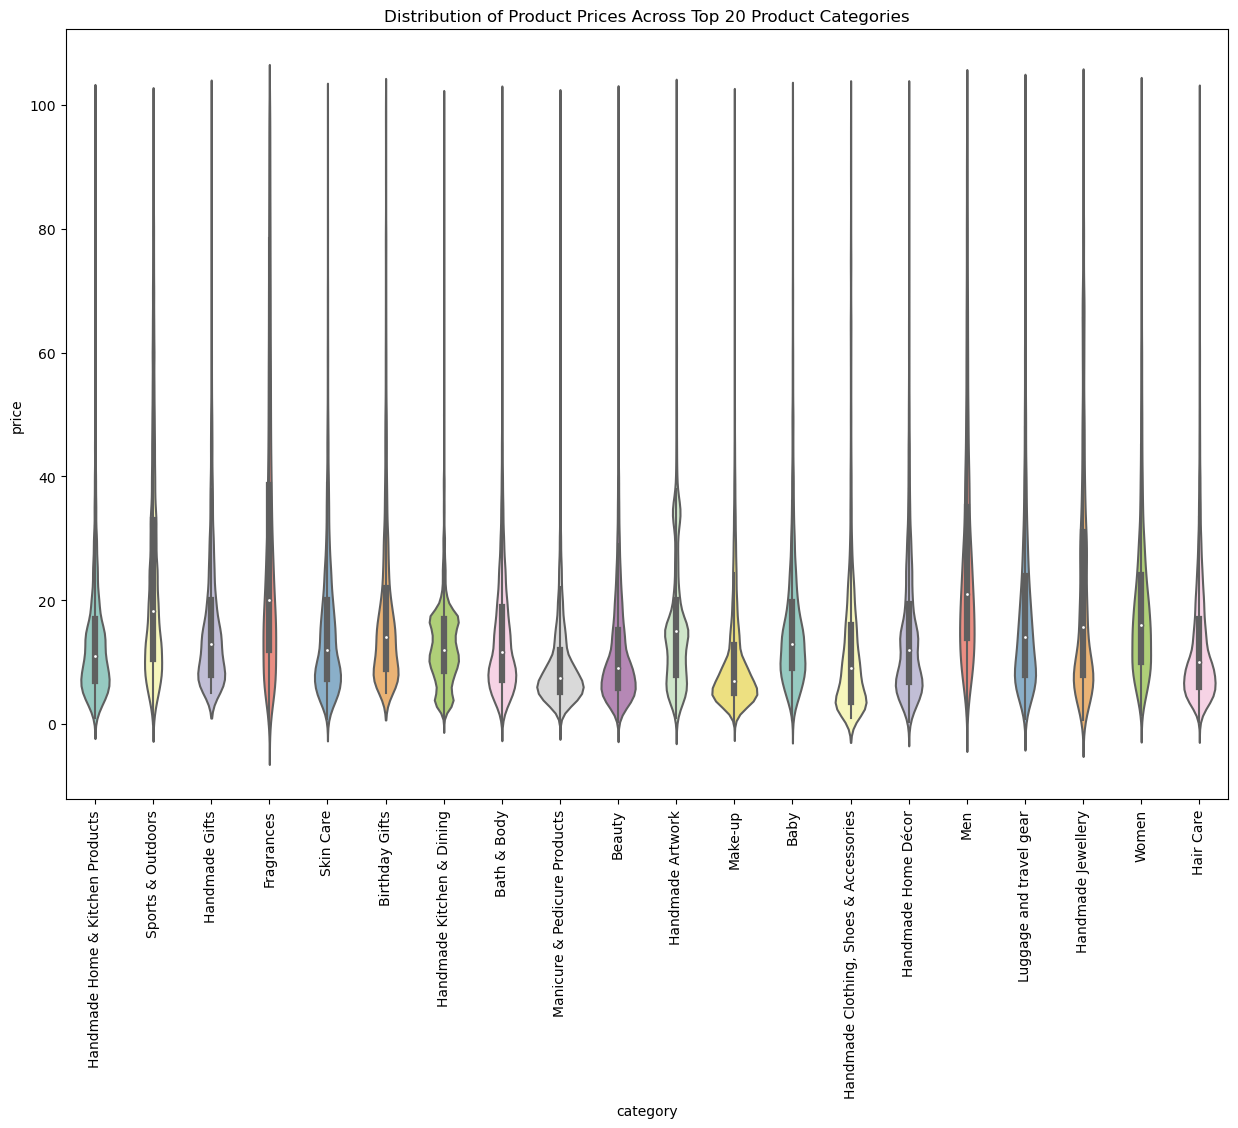

In [14]:
# Violin Plots
plt.figure(figsize=(15, 10))
top_20_categories = data_no_outliers['category'].value_counts().head(20).index
sns.violinplot(x='category', y='price', data=data_no_outliers[data_no_outliers['category'].isin(top_20_categories)], palette='Set3')
plt.xticks(rotation=90)
plt.title('Distribution of Product Prices Across Top 20 Product Categories')
plt.show()

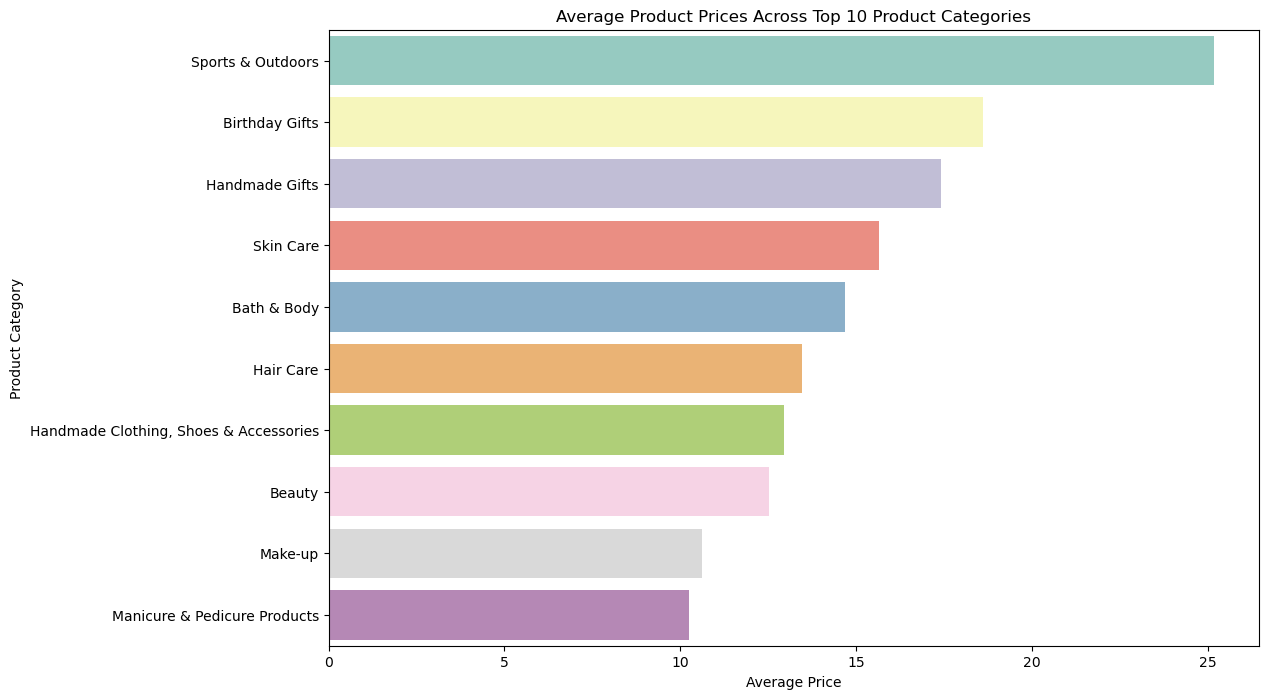

In [15]:
# Bar Charts
top_10_categories = data_no_outliers['category'].value_counts().head(10).index
avg_prices = data_no_outliers[data_no_outliers['category'].isin(top_10_categories)].groupby('category')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=avg_prices.values, y=avg_prices.index, palette='Set3')
plt.title('Average Product Prices Across Top 10 Product Categories')
plt.xlabel('Average Price')
plt.ylabel('Product Category')
plt.show()

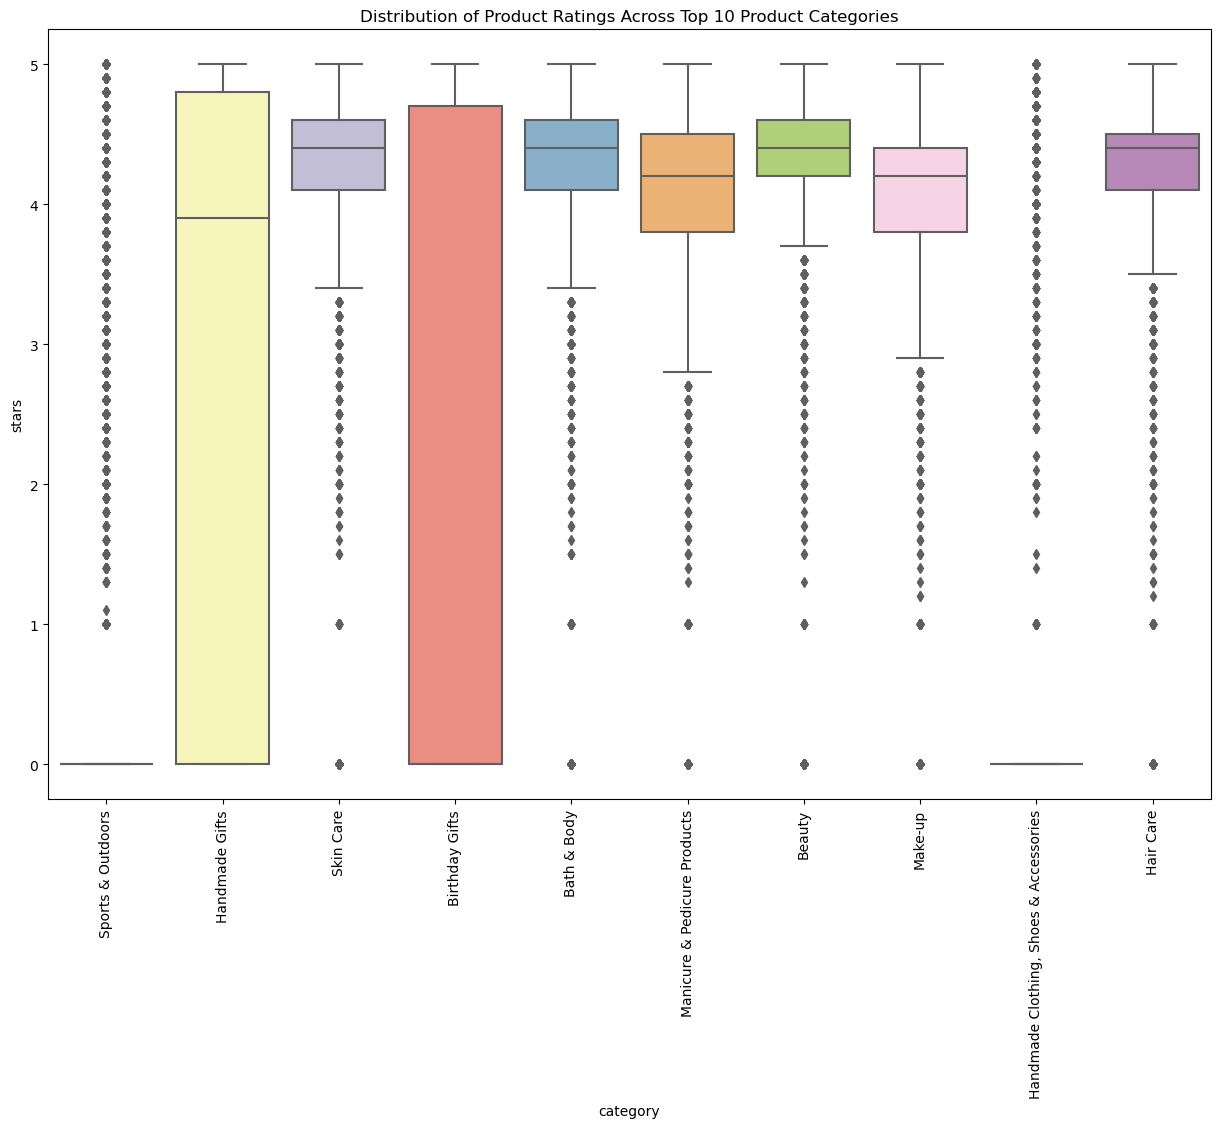

In [16]:
# Box Plots
plt.figure(figsize=(15, 10))
sns.boxplot(x='category', y='stars', data=data_no_outliers[data_no_outliers['category'].isin(top_10_categories)], palette='Set3')
plt.xticks(rotation=90)
plt.title('Distribution of Product Ratings Across Top 10 Product Categories')
plt.show()

In [17]:
# Part 3: Investigating the Interplay Between Product Prices and Ratings

# Correlation Coefficients
correlation = data_no_outliers[['price', 'stars']].corr()
print(correlation)

          price     stars
price  1.000000 -0.077673
stars -0.077673  1.000000


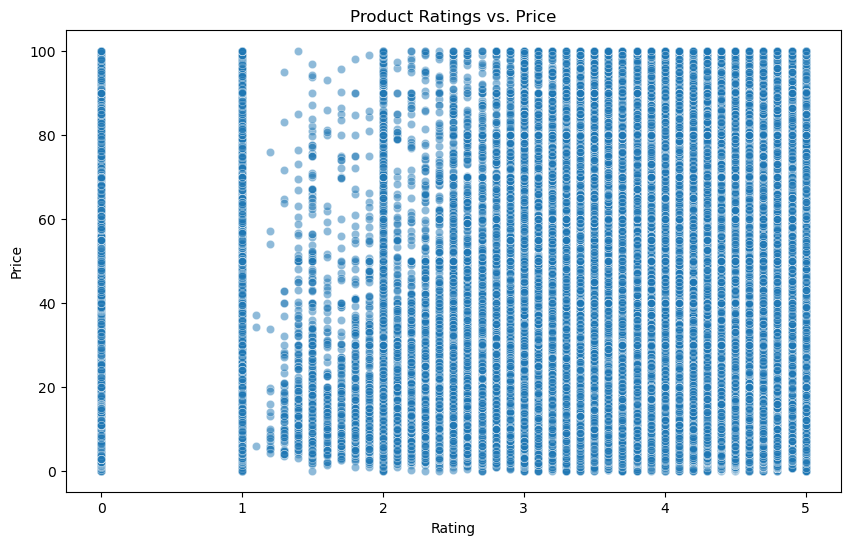

In [18]:
# Visualizations
plt.figure(figsize=(10, 6))
sns.scatterplot(x='stars', y='price', data=data_no_outliers, alpha=0.5)
plt.title('Product Ratings vs. Price')
plt.xlabel('Rating')
plt.ylabel('Price')
plt.show()

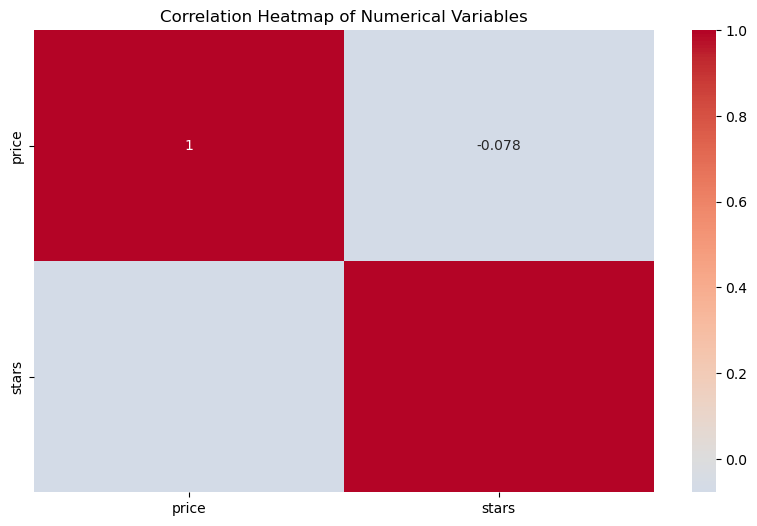

In [19]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

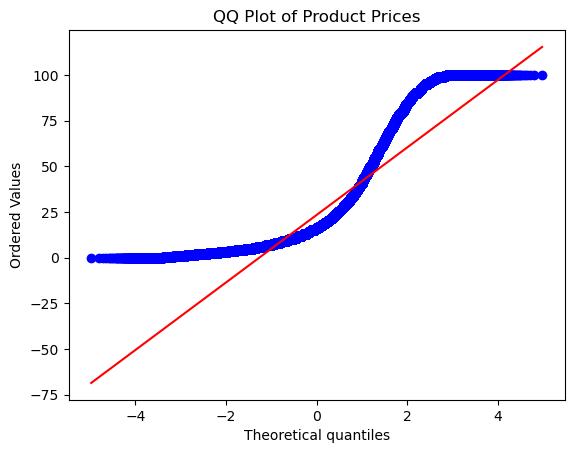

In [20]:
import scipy.stats as stats

stats.probplot(data_no_outliers['price'], dist="norm", plot=plt)
plt.title('QQ Plot of Product Prices')
plt.show()

In [21]:
# Bonus: Analysis Without Removing Outliers

correlation_with_outliers = data[['price', 'stars']].corr()
print(correlation_with_outliers)

          price     stars
price  1.000000 -0.124907
stars -0.124907  1.000000


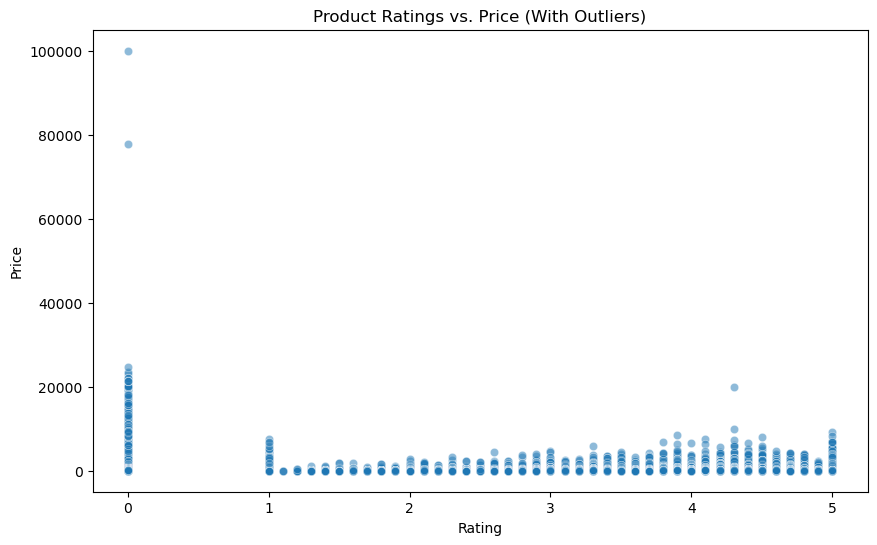

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='stars', y='price', data=data, alpha=0.5)
plt.title('Product Ratings vs. Price (With Outliers)')
plt.xlabel('Rating')
plt.ylabel('Price')
plt.show()

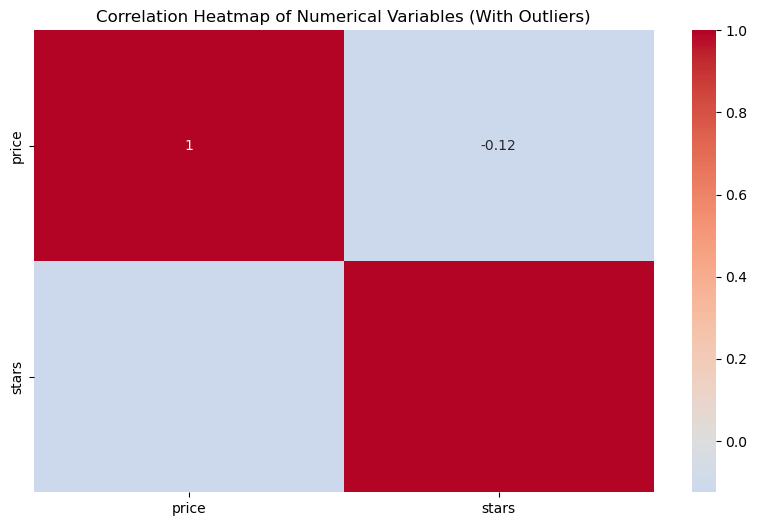

In [23]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_with_outliers, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Variables (With Outliers)')
plt.show()

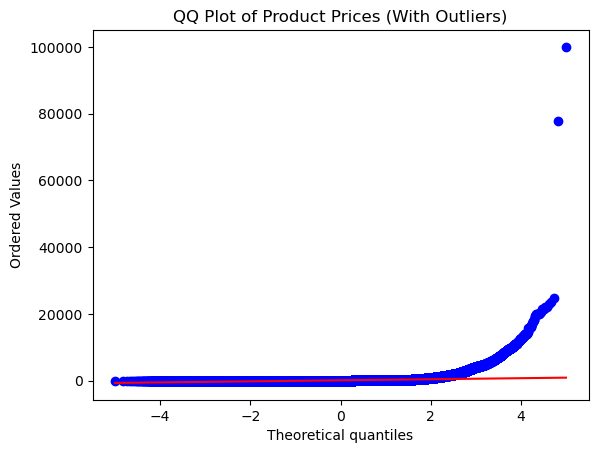

In [24]:
stats.probplot(data['price'], dist="norm", plot=plt)
plt.title('QQ Plot of Product Prices (With Outliers)')
plt.show()